C:\Users\Marco\AppData\Local\Temp\ipykernel_27704\4100982049.py:39: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.

C:\Users\Marco\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.



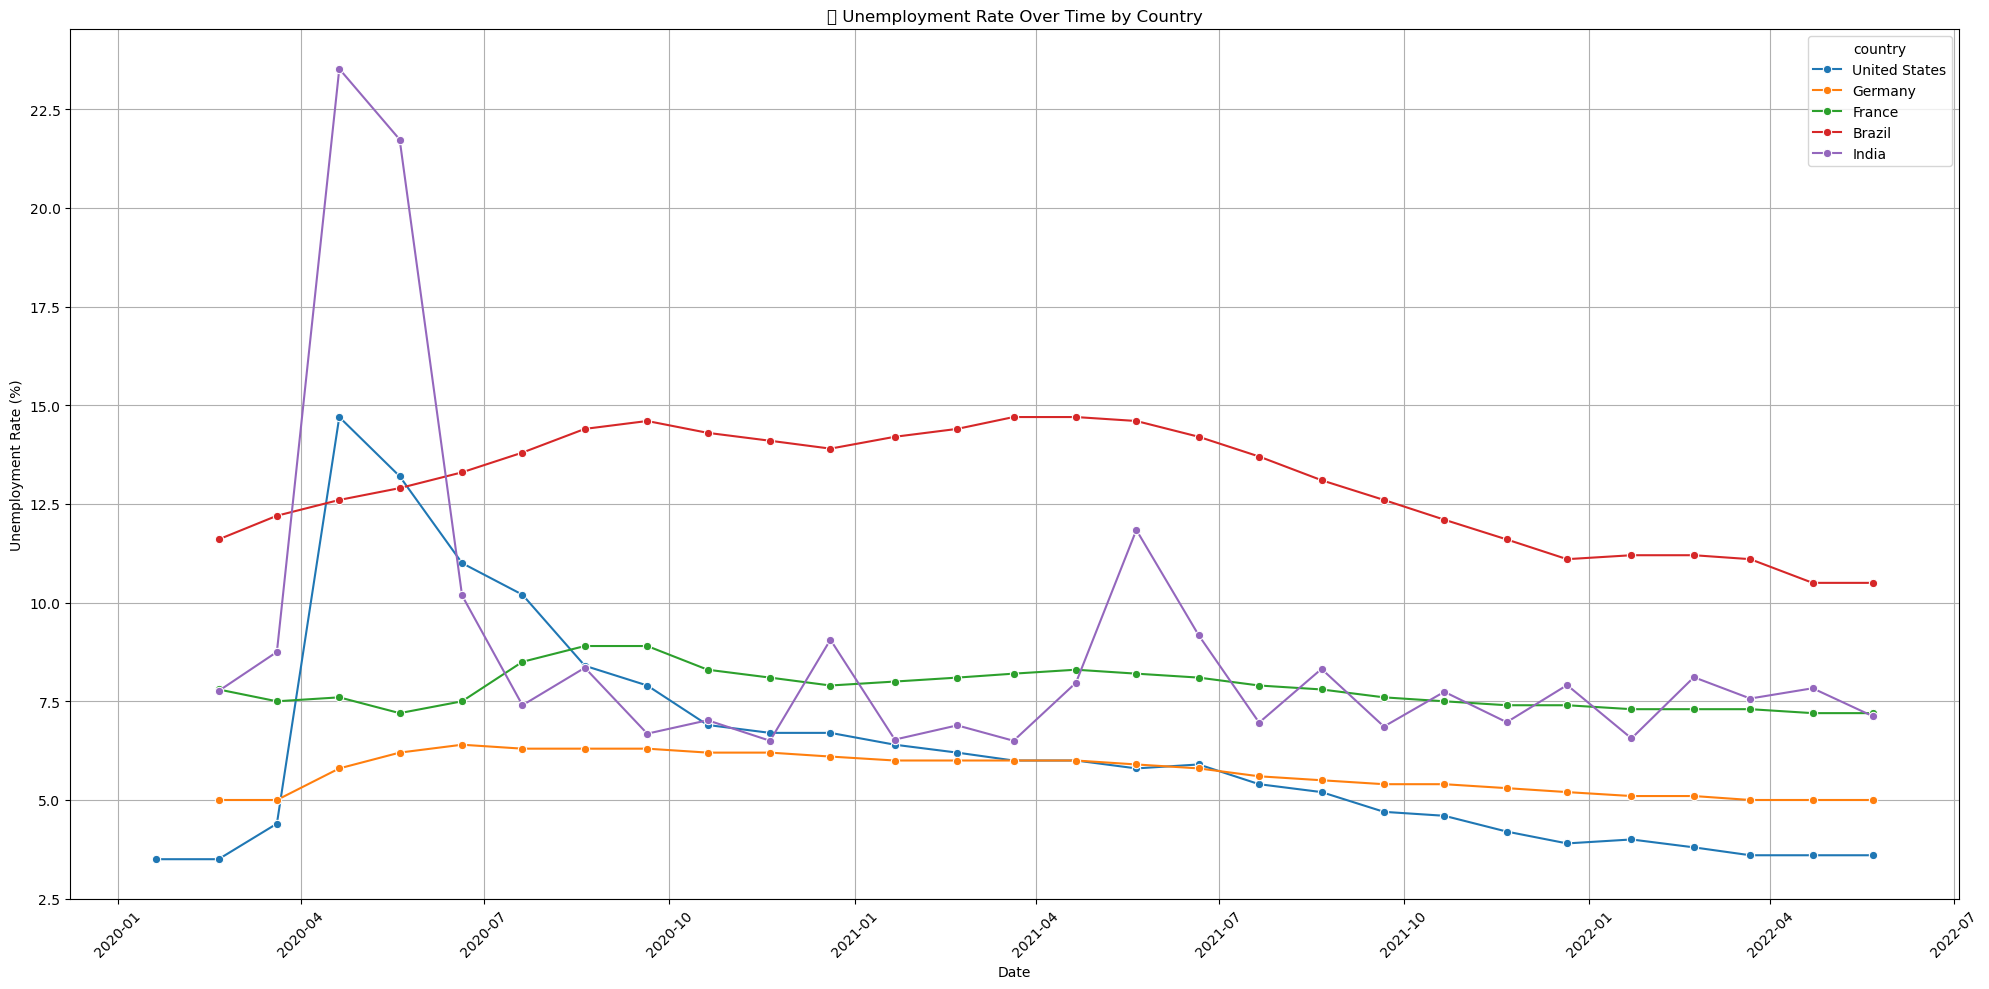

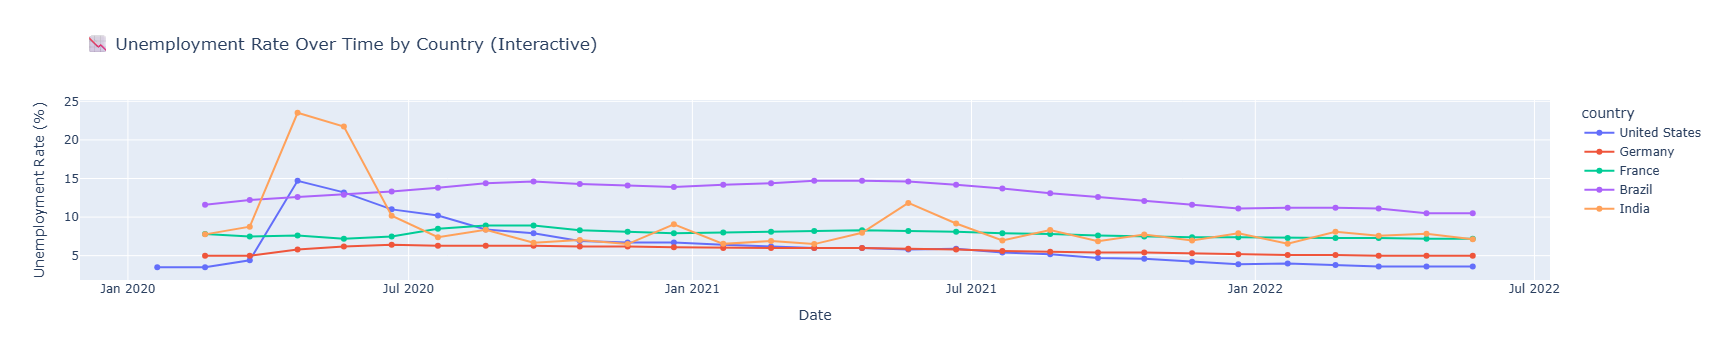

C:\Users\Marco\AppData\Local\Temp\ipykernel_27704\4100982049.py:70: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

C:\Users\Marco\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



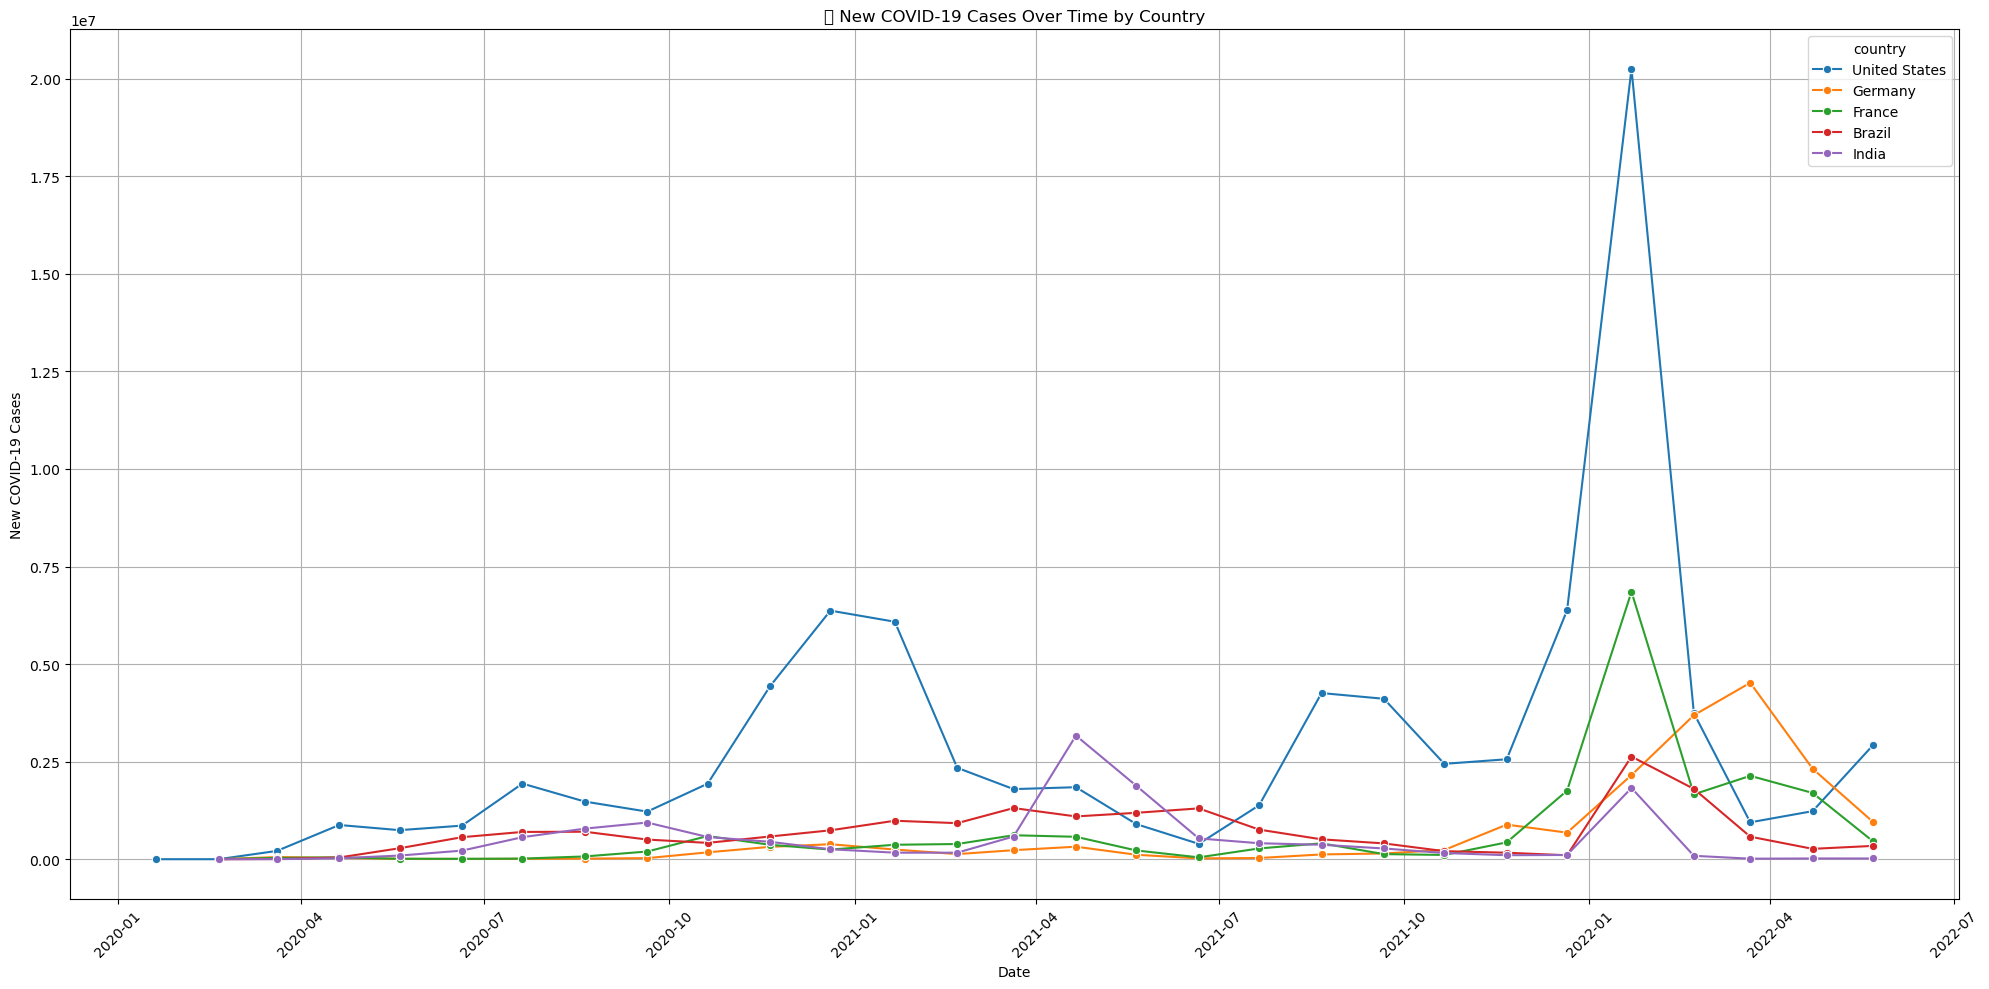

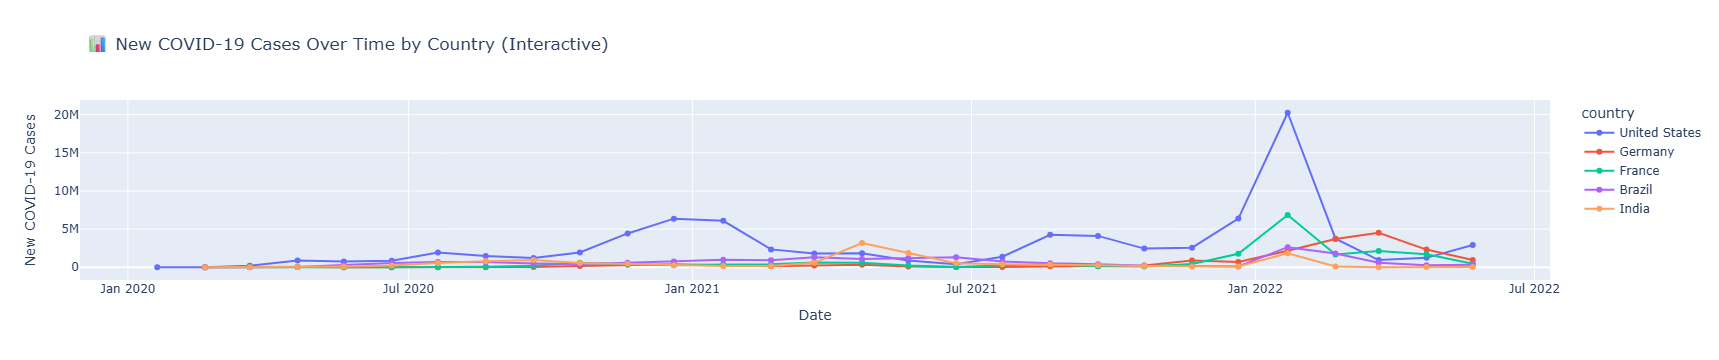

📉 Pearson Correlation Between COVID Cases & Unemployment Rate:

         country  correlation
0         Brazil     0.183082
1         France    -0.359322
2        Germany    -0.568787
3          India    -0.112199
4  United States    -0.214949


C:\Users\Marco\AppData\Local\Temp\ipykernel_27704\4100982049.py:92: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Marco\AppData\Local\Temp\ipykernel_27704\4100982049.py:114: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.

C:\Users\Marco\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.



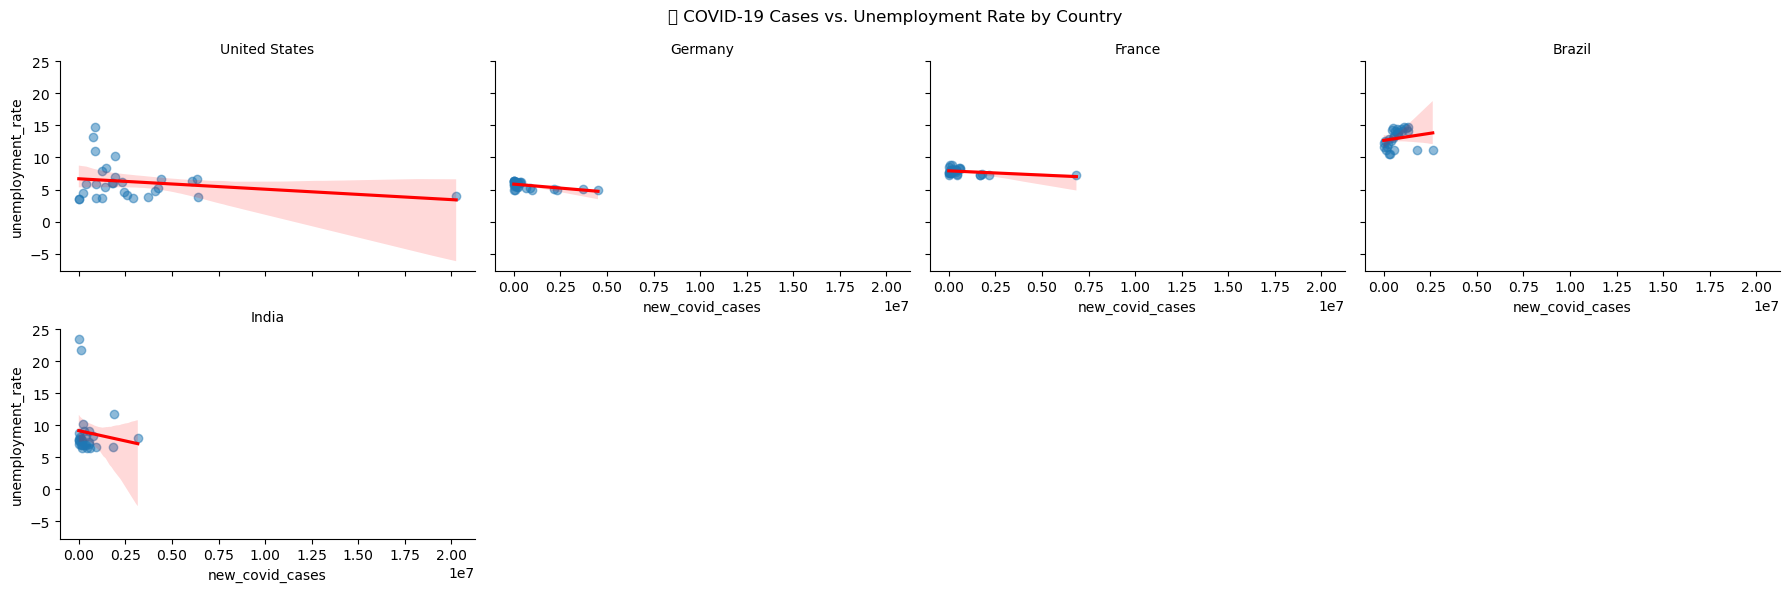

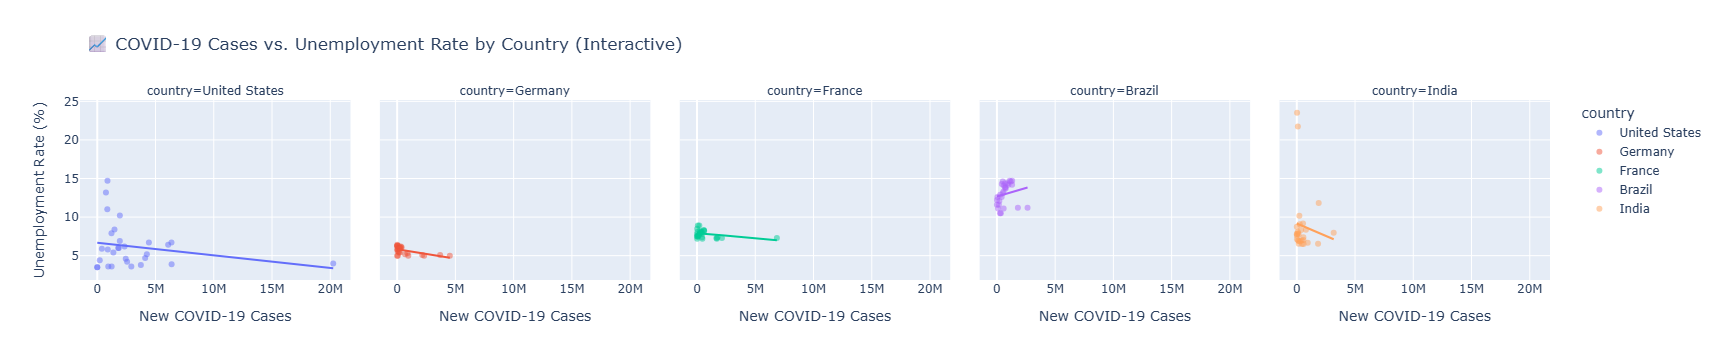

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# 📄 Load Excel data
df_covid_all = pd.read_excel("COVID-19 Project COVID Cases.xlsx")

# 🧼 Clean column names
df_covid_all.columns = df_covid_all.columns.str.strip().str.lower().str.replace(' ', '_')

# 🗓️ Convert date column
df_covid_all['date'] = pd.to_datetime(df_covid_all['date'], errors='coerce')

# 🔢 Ensure numeric types
df_covid_all['new_covid_cases'] = pd.to_numeric(df_covid_all['new_covid_cases'], errors='coerce')
df_covid_all['unemployment_rate'] = pd.to_numeric(df_covid_all['unemployment_rate'], errors='coerce')

# 📅 Extract year and month
df_covid_all['year'] = df_covid_all['date'].dt.year
df_covid_all['month'] = df_covid_all['date'].dt.month_name().str[:3]

# ------------------------------------------------------------------------------
# 📈 Static Line Plot: Unemployment Rate Over Time
plt.figure(figsize=(20, 10))
sns.lineplot(
    data=df_covid_all,
    x='date',
    y='unemployment_rate',
    hue='country',
    marker='o'
)
plt.title("📉 Unemployment Rate Over Time by Country")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 🌐 Interactive Line Plot: Unemployment Rate
fig = px.line(
    df_covid_all,
    x='date',
    y='unemployment_rate',
    color='country',
    title='📉 Unemployment Rate Over Time by Country (Interactive)',
    markers=True,
    labels={'unemployment_rate': 'Unemployment Rate (%)', 'date': 'Date'}
)
fig.update_layout(xaxis_title='Date', yaxis_title='Unemployment Rate (%)')
fig.show()

# ------------------------------------------------------------------------------
# 📈 Static Line Plot: COVID-19 Cases Over Time
plt.figure(figsize=(20, 10))
sns.lineplot(
    data=df_covid_all,
    x='date',
    y='new_covid_cases',
    hue='country',
    marker='o'
)
plt.title("📊 New COVID-19 Cases Over Time by Country")
plt.xlabel("Date")
plt.ylabel("New COVID-19 Cases")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 🌐 Interactive Line Plot: COVID-19 Cases
fig = px.line(
    df_covid_all,
    x='date',
    y='new_covid_cases',
    color='country',
    title='📊 New COVID-19 Cases Over Time by Country (Interactive)',
    markers=True,
    labels={'new_covid_cases': 'New COVID-19 Cases', 'date': 'Date'}
)
fig.update_layout(xaxis_title='Date', yaxis_title='New COVID-19 Cases')
fig.show()

# ------------------------------------------------------------------------------
# 📉 Pearson Correlation Between COVID Cases & Unemployment Rate
print("📉 Pearson Correlation Between COVID Cases & Unemployment Rate:\n")
correlations = (
    df_covid_all.dropna(subset=['new_covid_cases', 'unemployment_rate'])
    .groupby('country', group_keys=False)
    .apply(lambda group: group['new_covid_cases'].corr(group['unemployment_rate']))
    .rename('correlation')
    .reset_index()
)
print(correlations)

# ------------------------------------------------------------------------------
# 📈 Static Scatter Plot with Regression Line by Country
g = sns.lmplot(
    data=df_covid_all,
    x='new_covid_cases',
    y='unemployment_rate',
    col='country',
    col_wrap=4,
    height=3,
    aspect=1.5,
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
g.set_titles('{col_name}')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('📈 COVID-19 Cases vs. Unemployment Rate by Country')
plt.tight_layout()
plt.show()

# 🌐 Interactive Scatter Plot with Trendline
fig = px.scatter(
    df_covid_all,
    x='new_covid_cases',
    y='unemployment_rate',
    color='country',
    facet_col='country',
    facet_col_wrap=12,
    opacity=0.5,
    trendline='ols',
    title='📈 COVID-19 Cases vs. Unemployment Rate by Country (Interactive)',
    labels={
        'new_covid_cases': 'New COVID-19 Cases',
        'unemployment_rate': 'Unemployment Rate (%)'
    }
)
fig.show()
